In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.IMAGENETTE_160)

In [ ]:
dls = ImageDataLoaders.from_folder(path, valid='val',
                                  item_tfms=RandomResizedCrop(128, min_scale=0.35),
                                  batch_tfms=Normalize.from_stats(*imagenet_stats))

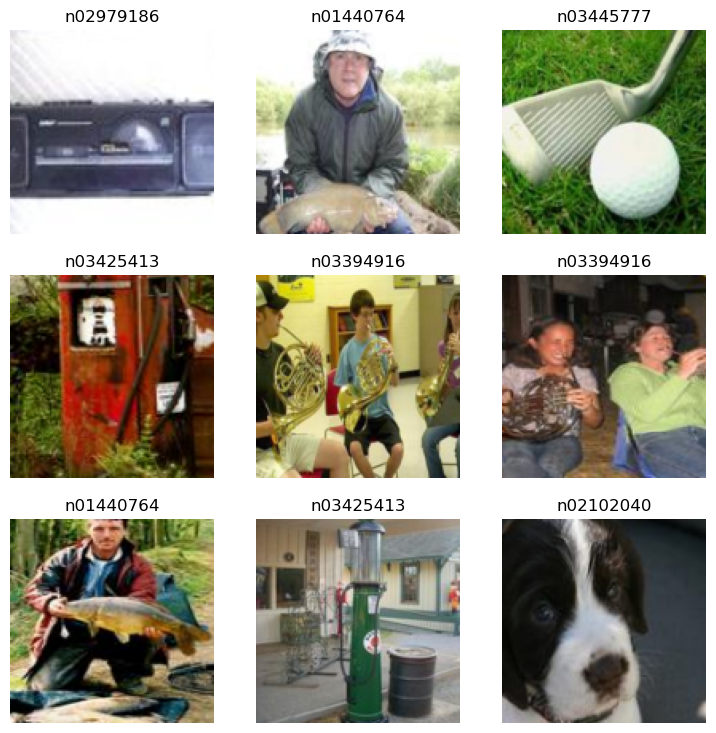

In [ ]:
dls.show_batch()

In [ ]:
fnames = get_image_files(path)

In [ ]:
len(fnames)

13394

In [ ]:
fnames[0]

Path('/home/nex/.fastai/data/imagenette2-160/val/n03417042/n03417042_12601.JPEG')

In [ ]:
dblock = DataBlock()

In [ ]:
dsets = dblock.datasets(fnames)

In [ ]:
dsets.train[0]

(Path('/home/nex/.fastai/data/imagenette2-160/val/n03445777/n03445777_14281.JPEG'),
 Path('/home/nex/.fastai/data/imagenette2-160/val/n03445777/n03445777_14281.JPEG'))

In [ ]:
dblock = DataBlock(get_items = get_image_files)

In [ ]:
dsets = dblock.datasets(path)
dsets.train[0]

(Path('/home/nex/.fastai/data/imagenette2-160/val/n03394916/n03394916_49600.JPEG'),
 Path('/home/nex/.fastai/data/imagenette2-160/val/n03394916/n03394916_49600.JPEG'))

In [ ]:
parent_label(fnames[0])

'n03417042'

In [ ]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

In [ ]:
def label_func(fname):
    return lbl_dict[parent_label(fname)]

In [ ]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(path)
dsets.train[0]

(PILImage mode=RGB size=212x160, TensorCategory(7))

In [ ]:
dsets.vocab

['English springer', 'French horn', 'cassette player', 'chain saw', 'church', 'garbage truck', 'gas pump', 'golf ball', 'parachute', 'tench']

In [ ]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter())

dsets = dblock.datasets(path)
dsets.train[0]

(PILImage mode=RGB size=213x160, TensorCategory(5))

In [ ]:
label_func(fnames[0])

'garbage truck'

In [ ]:
fnames[0]

Path('/home/nex/.fastai/data/imagenette2-160/val/n03417042/n03417042_12601.JPEG')

In [ ]:
# TODO add validation
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter(),
                   item_tfms = RandomResizedCrop(128, min_scale=0.35), 
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

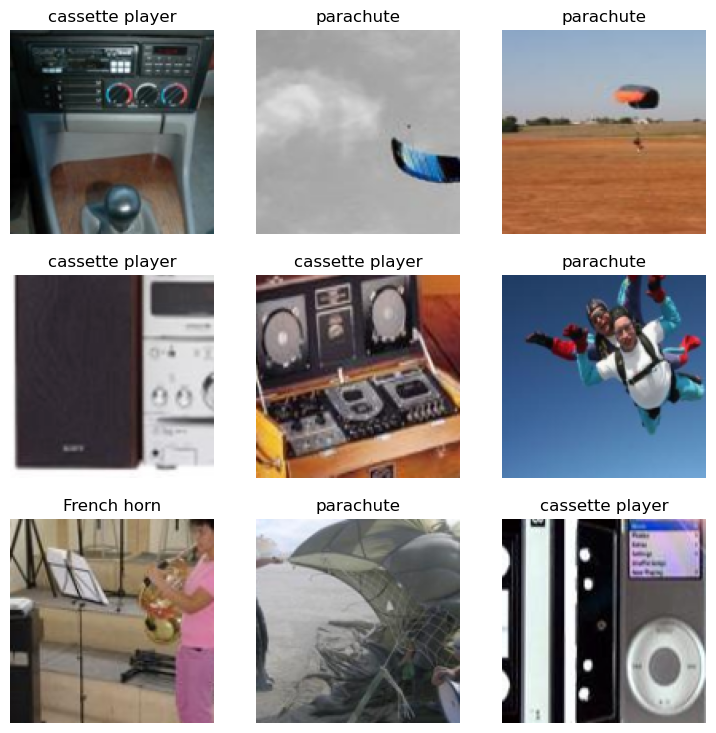

In [ ]:
dls = dblock.dataloaders(path)
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/home/nex/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nex/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.461072,None,None,00:15


/home/nex/.local/lib/python3.10/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,0.237238,None,None,00:19


In [ ]:
learn.export("imagenette.pkl")